In [11]:
# Importing all the Required Libraries

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [12]:
# Load data

boston = datasets.load_boston()
print(boston.data.shape, boston.target.shape)
print(boston.feature_names)

(506, 13) (506,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


## Data Details

Boston House Prices dataset
===========================

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM   per capita crime rate by town
        - ZN   proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS   proportion of non-retail business acres per town
        - CHAS   Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX   nitric oxides concentration (parts per 10 million)
        - RM   average number of rooms per dwelling
        - AGE   proportion of owner-occupied units built prior to 1940
        - DIS   weighted distances to five Boston employment centres
        - RAD   index of accessibility to radial highways
        - TAX   full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B   1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT           - MEDV Median value of owner-occupied homes in $1000's

    :Missing Attribute Values: None
% lower status of the population

    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of UCI ML housing dataset.
http://archive.ics.uci.edu/ml/datasets/Housing

This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.

In [13]:
# Loading the data in Data Frames

data = pd.DataFrame(boston.data,columns=boston.feature_names)
data = pd.concat([data,pd.Series(boston.target,name='MEDV')],axis=1)
data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

## Feature Selection:


Let’s select one of the numerical fields for model fitting here “LSTAT” i.e. % of the population in the neighborhood which comes under lower economic status.

In [14]:
X = data[['LSTAT']]
y = data['MEDV']

## Train test split :

In [15]:
x_training_set, x_test_set, y_training_set, y_test_set = train_test_split(X,y,test_size=0.10, random_state=42, shuffle=True)

## Training/model fitting with various degrees :


Fit the model to selected supervised data. We will use the API called Polynomial Features which takes the parameter as the degree of the polynomial. With the given polynomial degree we will fit the data with the linear regression model.

The motive of this fitting is to see if there is a better explanation of the variance with an increase in the degree of the polynomial of the selected feature.

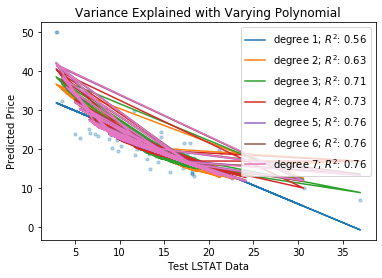

In [16]:
# Polynomial Regression-nth order
plt.scatter(x_test_set, y_test_set, s=10, alpha=0.3)

for degree in [1,2,3,4,5,6,7]:

    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

    model.fit(x_training_set,y_training_set)

    y_plot = model.predict(x_test_set)

    plt.plot(x_test_set, y_plot, label="degree %d" % degree +'; $R^2$: %.2f' % model.score(x_test_set, y_test_set))

plt.legend(loc='upper right')

plt.xlabel("Test LSTAT Data")

plt.ylabel("Predicted Price")

plt.title("Variance Explained with Varying Polynomial")

plt.show()


## We can notice that R^2 has increased from 0.56 – > 0.63 -> 0.71 -> 0.73  with rising in the degree of the polynomial initially and then it has saturated at 0.76.